# ML Clustering - Network Intrusion Detection
## Part 2 - DATA ANALYSIS

In this notebook, we load the processed dataset file and analyze it using PCA and KMeans.

> **INPUT:** the ready dataset csv file as cleaned and processed in the previous phases.<br>
> **OUTPUT:** the analysis of the obtained clusters as well as a distance threshold to spot anomalous connections.

### 1. INITIALIZATION

In [1]:
# Import necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

In [2]:
# Set display options
pd.set_option('display.max_columns', None)

### 2. LOADING DATASET

In [3]:
# Initialize required variables to read the processed data file
data_file_location = "..\\data\\processed\\"
data_file_name = "kddcup99_processed"
data_file_ext = ".csv"

# Read the dataset
data = pd.read_csv(data_file_location + data_file_name + data_file_ext, index_col=0)

In [4]:
# Check the dataset and its shape
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_combined,service_domain_u,service_ftp_data,service_http,service_other,service_private,service_smtp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.160795,-0.011423,0.101928,-0.002678,0.0,-0.002245,-0.053064,-0.007497,0.628588,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062316,-0.276391,-0.339602,-0.058059,-0.065373,-0.244321,-0.246814,0.160559,-0.157977,-0.478531,-1.439325,-2.318697,-2.759007,-0.313569,-0.480341,-0.478684,-0.070608,-0.057352,-0.256661,-0.255531,-0.125600,0.517992,-0.493777,-0.191654,-0.250813,-0.201528,0.759521,-0.247942,-0.287968,-0.329058,-0.003649,-0.241205,-0.024903,-0.018748,-0.034907,-0.023263,-0.01252,-0.006865,0.247974,-0.001431
1,-0.160795,-0.011904,0.002200,-0.002678,0.0,-0.002245,-0.053064,-0.007497,0.628588,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062316,-0.244088,-0.309068,-0.058059,-0.065373,-0.244321,-0.246814,0.160559,-0.157977,-0.478531,-1.429656,-2.307216,0.508189,-0.313569,3.027331,-0.478684,-0.070608,-0.057352,-0.256661,-0.255531,-0.125600,0.517992,-0.493777,-0.191654,-0.250813,-0.201528,0.759521,-0.247942,-0.287968,-0.329058,-0.003649,-0.241205,-0.024903,-0.018748,-0.034907,-0.023263,-0.01252,-0.006865,0.247974,-0.001431
2,-0.160795,-0.011233,-0.005916,-0.002678,0.0,-0.002245,-0.053064,-0.007497,0.628588,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062316,-0.276391,-0.339602,-0.058059,-0.065373,-0.244321,-0.246814,0.160559,-0.157977,-0.478531,-1.419987,-2.295734,0.508189,-0.313569,1.273495,-0.478684,-0.070608,-0.057352,-0.256661,-0.255531,-0.125600,0.517992,-0.493777,-0.191654,-0.250813,-0.201528,0.759521,-0.247942,-0.287968,-0.329058,-0.003649,-0.241205,-0.024903,-0.018748,-0.034907,-0.023263,-0.01252,-0.006865,0.247974,-0.001431
3,-0.160795,-0.011260,-0.003939,-0.002678,0.0,-0.002245,-0.053064,-0.007497,0.628588,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062316,-0.244088,-0.309068,-0.058059,-0.065373,-0.244321,-0.246814,0.160559,-0.157977,-0.478531,-1.410318,-2.284253,0.508189,-0.313569,0.677190,-0.478684,-0.070608,-0.057352,-0.256661,-0.255531,-0.125600,0.517992,-0.493777,-0.191654,-0.250813,-0.201528,0.759521,-0.247942,-0.287968,-0.329058,-0.003649,-0.241205,-0.024903,-0.018748,-0.034907,-0.023263,-0.01252,-0.006865,0.247974,-0.001431
4,-0.160795,-0.011205,-0.007741,-0.002678,0.0,-0.002245,-0.053064,-0.007497,0.628588,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062316,-0.211785,-0.278533,-0.058059,-0.065373,-0.244321,-0.246814,0.160559,-0.157977,-0.478531,-1.400650,-2.272772,0.508189,-0.313569,0.396577,-0.478684,-0.070608,-0.057352,-0.256661,-0.255531,-0.125600,0.517992,-0.493777,-0.191654,-0.250813,-0.201528,0.759521,-0.247942,-0.287968,-0.329058,-0.003649,-0.241205,-0.024903,-0.018748,-0.034907,-0.023263,-0.01252,-0.006865,0.247974,-0.001431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976153,-0.160795,-0.013372,-0.008937,-0.002678,0.0,-0.002245,-0.053064,-0.007497,-1.590866,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062316,

As discussed in the previous phase, the dataset is now ready for analysis using PCA and KMeans clustering.

### 3. PRINCIPLE COMPONENT ANALYSIS (PCA)

The original dataset along with the performed preprocessing tasks has led to a relatively high number of variables, which may pose additional unnecessary overload during the clustering analysis. Specifically that some variables might not be as much useful and may contain no relevant information to perform the clustering.

The goal of PCA is to convert the high-dimensional data distribution into a lower, more compact space. Namely by calculating new variables (so-called principle components) that represent the most important attributes in the original datasets.

Since the PCA includes distance-based calculations, our dataset was prepared by converting all attributes into a standardized version, maintaining the variance distribution in a normalized scale.

*One last note, PCA is primarily designed to work with numerical (quantitative) variables. At the same time, our dataset has three categorical features which were encoded into binary vectors. This might not perfectly fit the use case of PCA and there are many discussions regarding the applicability of PCA on categorical (qualitative) features. However, since the main objective of this project is to demonstrate some experiments of several data analysis techniques/algorithms, we will proceed with PCA keeping in mind that in more realistic scenarios a deeper analysis will be definitely recommended.*

In [5]:
# Initialize the PCA analyzer
pca = PCA()

# Fit the PCA on our dataset and implement transformations
pca_results = pca.fit_transform(data)

# Print the number of resulting components
print(f"Number of Principle Components: {pca.n_components_}")

# Print the explained variance percentage for each components, which represent how much variance the resulting component holds in the dataset. 
print(pca.explained_variance_ratio_)

# Save transformed data into a new DataFrame
data_pca_all = pd.DataFrame(pca_results, columns=pca.get_feature_names_out())


Number of Principle Components: 57
[1.22678330e-01 1.05693169e-01 7.20899555e-02 5.24839392e-02
 4.39725164e-02 4.24229588e-02 3.59102286e-02 3.12391672e-02
 2.86274830e-02 2.45768707e-02 2.26217967e-02 2.13310792e-02
 2.09323287e-02 1.94677012e-02 1.87409030e-02 1.84430430e-02
 1.82048251e-02 1.81243869e-02 1.79923642e-02 1.78587759e-02
 1.78575489e-02 1.77085010e-02 1.76213914e-02 1.75489300e-02
 1.72717562e-02 1.71136568e-02 1.69608720e-02 1.67789420e-02
 1.53490426e-02 1.39642473e-02 1.14244150e-02 9.47397923e-03
 8.76946403e-03 8.27723173e-03 7.86583607e-03 5.30401644e-03
 4.11486704e-03 3.87296284e-03 3.25206997e-03 3.16818532e-03
 2.53551634e-03 2.04649555e-03 1.69053185e-03 1.42744611e-03
 1.30775859e-03 1.23191150e-03 7.99023667e-04 6.44764106e-04
 6.07023779e-04 3.06990137e-04 2.16353155e-04 4.57722375e-05
 3.06740295e-05 3.08328682e-32 2.22675369e-32 1.82541351e-32
 6.44165419e-34]


Since we didn't specify the required number of components, nor did we instruct the PCA algorithm to maintain a minimum variance threshold, the resulting components are equal to the dataset attributes.

The results indicated that 12% of the variance is maintained in the 1st component, 10% in the 2nd component, 7% in the third one, and so on. Meaning that almost 30% of the information can be obtained only from the first 3 components.

Accordingly, it might be a good idea now to try to plot the data using the first three components to get an initial understanding of the sample distribution.

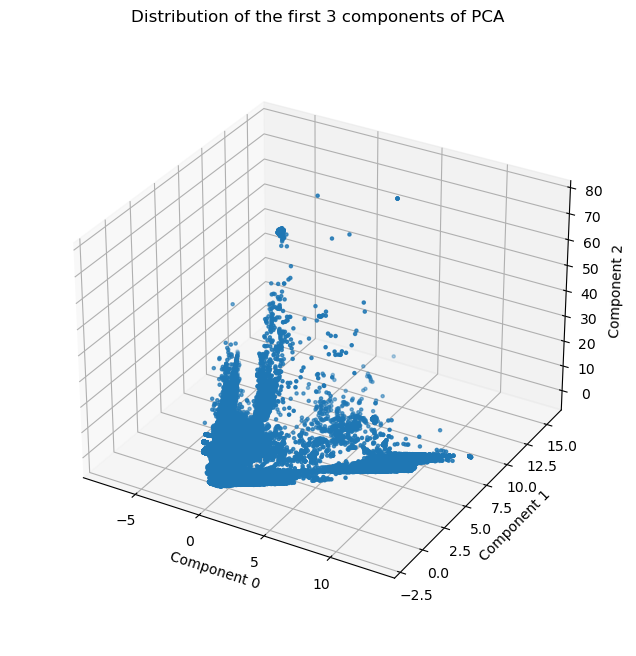

In [6]:
# Plot the first 3 components of PCA results on a 3d chart

# Create a 3D scatter plot
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")

# Scatter plot with filtered data
ax.scatter3D(data_pca_all["pca0"], data_pca_all["pca1"], data_pca_all["pca2"], marker='.')

# Set title for the plot
plt.title("Distribution of the first 3 components of PCA")

# Set labels for axes
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.set_zlabel("Component 2")

# Show the plot
ax.set_box_aspect(aspect=None, zoom=.9)
plt.show()

As we can observe from this 3d chart, we started to see some notion of grouping in the dataset, considering we are only considering 30% of the variance represented in the first 3 components.

We can also notice some outliers outspread far from the focus of other data points, which can be interpreted as abnormal or malicious connection samples in the dataset.

There are almost 1M samples presented in this chart, many of them are packed and stacked on top of each other making it quite difficult to identify separate data groups. However, let's try to plot only part of the samples within a limited scope of the axis.

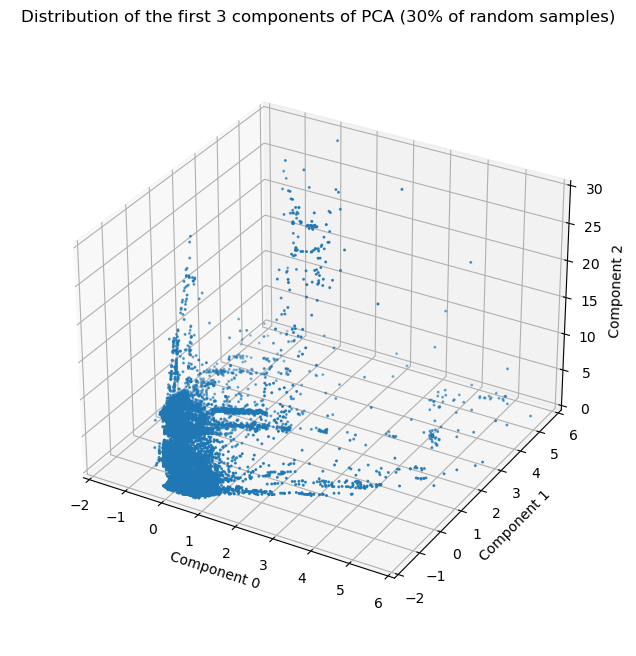

In [7]:
# Randomly sample a fraction of the data
sample_fraction = 0.25
data_pca_all_sampled = data_pca_all.sample(frac=sample_fraction)

# Define limits for the plot
x_limit = [-2, 6]
y_limit = [-2, 6]
z_limit = [0, 30]

# Filter data based on limits
data_pca_all_filtered = data_pca_all_sampled[
    (data_pca_all_sampled['pca0'] >= x_limit[0]) & (data_pca_all_sampled['pca0'] <= x_limit[1]) &
    (data_pca_all_sampled['pca1'] >= y_limit[0]) & (data_pca_all_sampled['pca1'] <= y_limit[1]) &
    (data_pca_all_sampled['pca2'] >= z_limit[0]) & (data_pca_all_sampled['pca2'] <= z_limit[1])
]

# Create a 3D scatter plot
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")

# Scatter plot with filtered data
ax.scatter3D(data_pca_all_filtered["pca0"], data_pca_all_filtered["pca1"], data_pca_all_filtered["pca2"], marker='.', s=5)

# Set title for the plot
plt.title("Distribution of the first 3 components of PCA (30% of random samples)")

# Set labels for axes
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.set_zlabel("Component 2")

# Set limits for the plot
ax.set_xlim(x_limit)
ax.set_ylim(y_limit)
ax.set_zlim(z_limit)

# Show the plot
ax.set_box_aspect(aspect=None, zoom=.9)
plt.show()

This figure represents a zoomed-in version of the previous chart, with only 25% randomly selected samples and having limits applied to the three considered axes.

Despite the data still being packed in the center, the closer look revealed a better overview of some groups that started to form in different areas of the chart.

Surely it's quite early to perfectly classify the data points in this chart, as the final clustering would rely on information still hidden in the remaining principle components.  

Since the primary goal of PCA is to reduce data dimensionality, we will utilize it to get red of the least important components that don't hold much variance and hence don't contribute to the data analysis.

In [8]:
# Initialize the PCA analyzer to maintain 90% of the information
pca = PCA(n_components=.9, svd_solver="full")

# Fit the PCA and implement transformations
pca_results = pca.fit_transform(data)

# Print the number of resulting components
print(f"Number of Principle Components: {pca.n_components_}")

# Print the explained variance ratio for each components, which represents how much variance the resulting component holds in the dataset. 
print(pca.explained_variance_ratio_)

# Save transformed data into a new DataFrame
data_pca = pd.DataFrame(pca_results, columns=pca.get_feature_names_out())

Number of Principle Components: 29
[0.12267833 0.10569317 0.07208996 0.05248394 0.04397252 0.04242296
 0.03591023 0.03123917 0.02862748 0.02457687 0.0226218  0.02133108
 0.02093233 0.0194677  0.0187409  0.01844304 0.01820483 0.01812439
 0.01799236 0.01785878 0.01785755 0.0177085  0.01762139 0.01754893
 0.01727176 0.01711366 0.01696087 0.01677894 0.01534904]


These results show that 90% of the information is retained in 29 principle components, nearly half of all components. This indicates a significant dimensionality reduction of a decrease of almost 50% from the original data attributes.

### 4. SELECT BEST K VALUE (ELBOW METHOD)

As we know, determining the number of clusters in the dataset is not an easy and straightforward problem, and the K itself is a hyper-parameter for KMean algorithm which may take any arbitrary value.

Elbow Method is a technique used to determine the optimal number of clusters (k) for a given dataset. The method involves running the KMeans clustering algorithm for a range of values of k and plotting the within-cluster sum of squares (WCSS) as a function of the number of clusters. The WCSS is a measure of the compactness of the clusters; it is the sum of the squared distances between each data point and the centroid of its assigned cluster.

In [9]:
# Set the range of k values
min_k, max_k = (1,40)

# Initialize the within-cluster sum of squares vector
wcss = []

# Iterate through k values
for i in range(min_k, max_k+1):
    # Run KMeans for the current k
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_pca)
    
    # Append the wcss of the current clustering solution
    wcss.append(kmeans.inertia_)

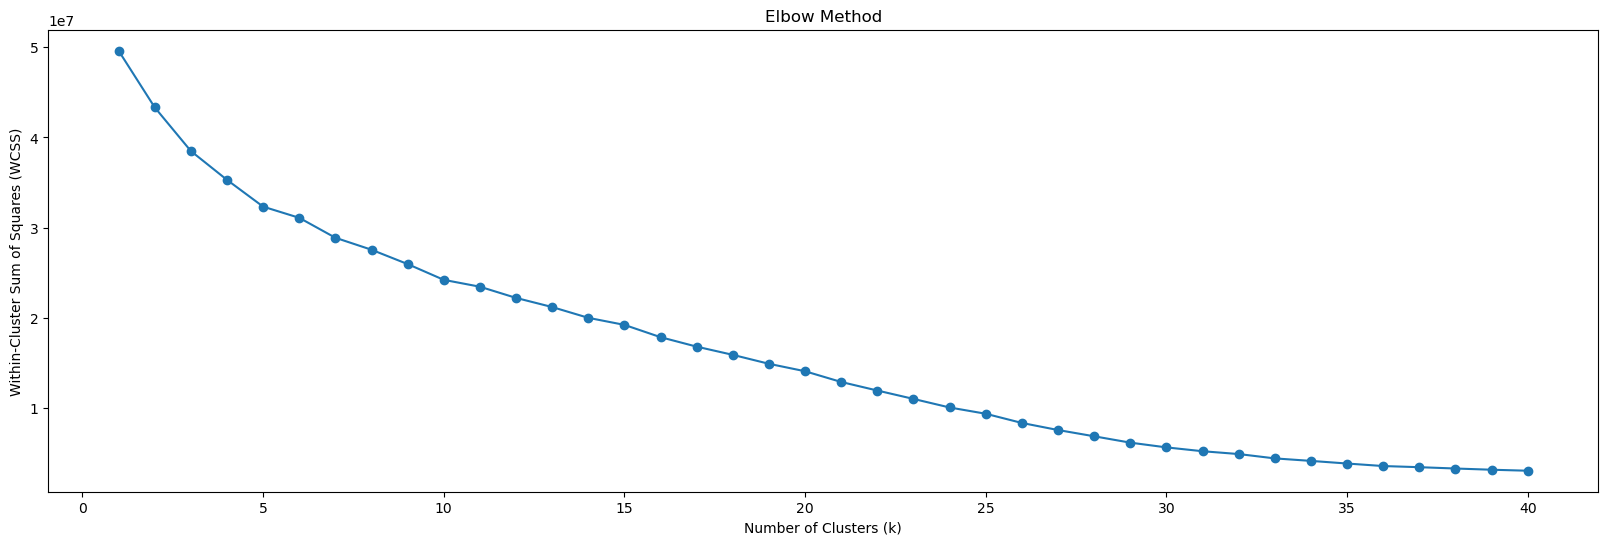

In [10]:
# Create a figure
plt.figure(figsize=(20,6))

# Plot inertia value for each k iteration
plt.plot(range(min_k, max_k+1), wcss, marker='o')

# Set plot title and labels
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

# Show the plot
plt.show()

Expectedly, we observe a declining trend indicating decreased WCSS values when considering more clusters. This is quite understandable since the very high number of clusters leads to each point being represented in its own cluster.

The idea of obtaining the optimal k value is to find a compromise between the number of clusters and WCSS.

From the chart above, the steadily declining trend without major steep steps (a sharp "elbow") indicates that the data samples may not exhibit a well-defined clustering structure, which makes it a little bit challenging to determine an optimal k value. In this case, we can resort to additional clustering evaluation methods (such as Silhouette Score) to further investigate the potential k ranges which is now beyond the scope of this demo.

However, even in this chart, we still observe some sort of steep decline down until k=10, when afterward the slope starts to become smoother with lower variations in the WCSS. Accordingly, we may consider k around this value as the best number of clusters for this dataset.

### 5. IMPLEMENTING KMEANS

As discussed in the previous step, the Elbow Method suggested a trade-off k value. It's time now to implement KMeans algorithm and explore how the clustering will look like for our dataset.

In [57]:
# Set the best k
bestK = 10

# Implement KMeans algorithm on our dataset using the best k value
kmeans = KMeans(n_clusters=bestK, init='k-means++', max_iter=300, n_init=10)
clusters = kmeans.fit_predict(data_pca)

In [61]:
# Copy the data set and add generated clusters
data_pca_with_cluster = data_pca.copy()
data_pca_with_cluster["cluster"] = clusters

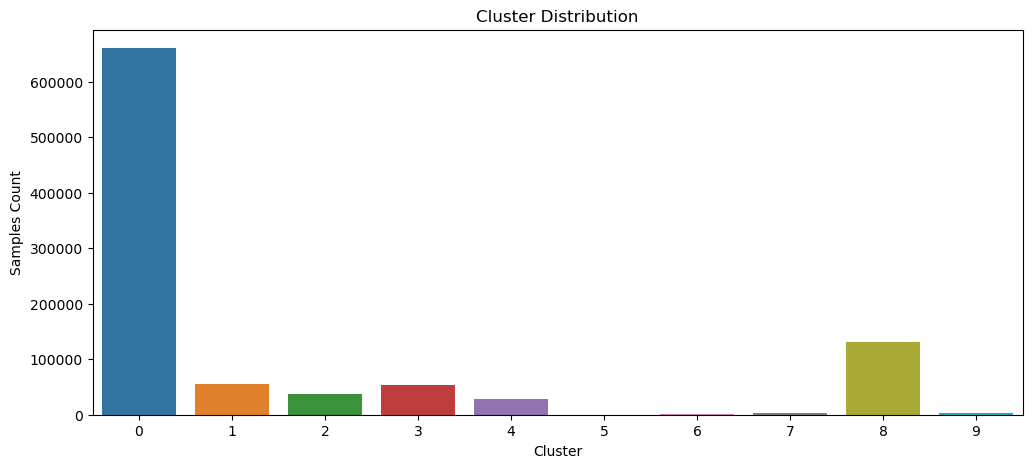

In [62]:
# Check sample distribution of generated clusters

# Create figure
plt.figure(figsize=(12, 5))

# Plot data points
sns.countplot(data=data_pca_with_cluster, x="cluster")

# Set plot title and axis labels
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Samples Count")

# Show the plot
plt.show()

The distribution chart shows that more than 50% of samples belong to one cluster that may represent the majority of normal connections, while the remaining samples are unequally distributed among other groups. We also notice some clusters with a very low number of observations, which may refer to isolated groups of data points with similar features.

To have a look at how the clustering split the dataset, we can plot again the PCA results using the first three components.

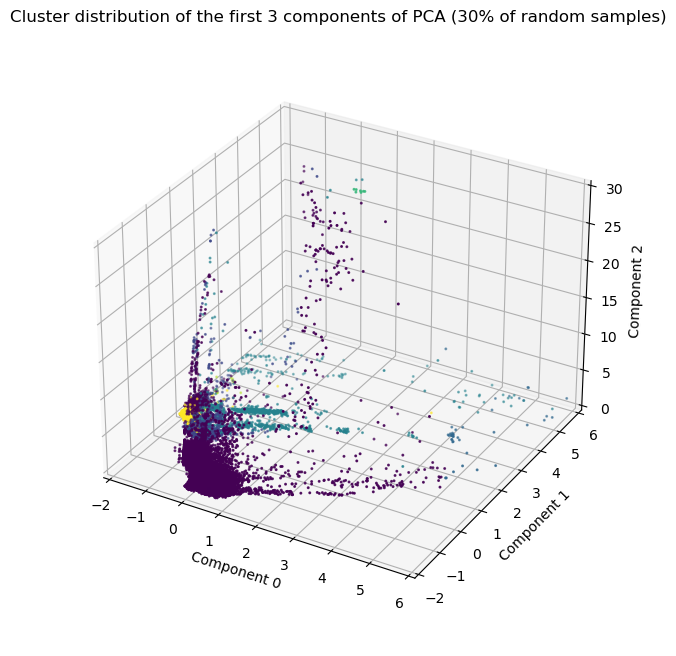

In [67]:
# Randomly sample a fraction of the data
sample_fraction = 0.20
data_pca_sampled = data_pca_with_cluster.sample(frac=sample_fraction)

# Define limits for the plot
x_limit = [-2, 6]
y_limit = [-2, 6]
z_limit = [0, 30]

# Filter data based on limits
data_pca_filtered = data_pca_sampled[
    (data_pca_sampled['pca0'] >= x_limit[0]) & (data_pca_sampled['pca0'] <= x_limit[1]) &
    (data_pca_sampled['pca1'] >= y_limit[0]) & (data_pca_sampled['pca1'] <= y_limit[1]) &
    (data_pca_sampled['pca2'] >= z_limit[0]) & (data_pca_sampled['pca2'] <= z_limit[1])
]

# Create a 3D scatter plot
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")

# Scatter plot with filtered data
ax.scatter3D(data_pca_filtered["pca0"], data_pca_filtered["pca1"], data_pca_filtered["pca2"], marker='.', s=5, c=data_pca_filtered["cluster"])

# Set title for the plot
plt.title("Cluster distribution of the first 3 components of PCA (30% of random samples)")

# Set labels for axes
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.set_zlabel("Component 2")

# Set limits for the plot
ax.set_xlim(x_limit)
ax.set_ylim(y_limit)
ax.set_zlim(z_limit)

# Show the plot
ax.set_box_aspect(aspect=None, zoom=.9)
plt.show()

This plot shows how the samples are distributed among the generated clusters, we see one cluster dominating the majority of samples with other smaller clusters combining the remaining samples.

Surely, this chart alone is not enough to understand or evaluate the cluster distribution since it encompasses the first 3 components, nevertheless, it partially shows how KMeans results were able to separate the dataset into similar groups.

### 6. ANOMALY DETECTION

The ultimate goal of clustering our dataset is to spot unusual data points that are different from the other normal connections.

Having all samples grouped into separate clusters indicates similarities between them. However, the farther the data point is from the cluster centroid the less similar it is to other cluster samples, and thus, the more likely this data point is to be an outlier.

Accordingly, to detect outliers in a clustered data set, we may rely on a maximum threshold of how far the anomalous sample is from its cluster's centroid. To do so, we must first calculate the distance from each sample to its assigned cluster.

In [69]:
# Calculate distance of each data point to its cluster centroid
distances = kmeans.transform(data_pca_with_cluster.drop("cluster", axis=1))

# Extract the distance to the corresponding cluster for each data point
data_pca_with_cluster['distance_to_centroid'] = distances[range(len(data_pca)), kmeans.labels_]

# Check how the data frame looks like with cluster details
data_pca_with_cluster.head(10)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,cluster,distance_to_centroid
0,-0.528898,-0.093066,0.042358,2.067636,-0.152345,-0.318170,0.176869,-0.225085,-0.375969,-0.719573,0.259891,-0.191770,-0.078167,-0.132849,0.324653,0.003730,0.061295,-0.053358,-0.007354,0.002934,0.004129,-0.016838,-0.162854,-0.068233,0.346312,-0.246484,-0.006294,-0.010069,0.015052,0,2.637588
1,-0.175447,-0.002151,-0.159658,1.715892,-0.142162,-0.374582,-0.887742,0.266090,-0.567962,-0.738787,0.323933,0.217796,-0.261315,-0.818023,0.677401,-0.157330,0.073380,-0.195280,0.020275,-0.015619,0.001850,-0.001102,-0.190968,-0.118430,0.576216,0.163927,0.004400,-0.088972,-0.073777,0,2.779459
2,-0.052269,-0.477112,-0.076145,1.481068,-0.136729,-0.228123,-0.443400,0.176111,-0.320505,-0.630498,0.236761,0.144755,-0.175759,-0.564614,0.553287,-0.128806,0.077427,-0.179792,0.006180,-0.007353,0.002860,-0.011323,-0.177256,-0.093578,0.453350,0.074993,-0.047342,-0.054935,-0.057927,0,2.046660
3,-0.013376,-0.642108,-0.043160,1.376096,-0.124783,-0.207029,-0.319302,0.138333,-0.248504,-0.576483,0.208512,0.108911,-0.144995,-0.467396,0.501199,-0.113855,0.076051,-0.167198,0.001545,-0.004154,0.002893,-0.014879,-0.169404,-0.083258,0.404223,0.039229,-0.058172,-0.040861,-0.058753,0,1.796900
4,0.003681,-0.721880,-0.025861,1.315440,-0.115219,-0.207934,-0.271858,0.118377,-0.218866,-0.543725,0.195862,0.087307,-0.130266,-0.419312,0.469259,-0.104784,0.074981,-0.159721,-0.000699,-0.002486,0.002765,-0.016865,-0.164937,-0.077198,0.376339,0.019768,-0.065284,-0.033255,-0.061256,0,1.672461
5,0.013462,-0.773234,-0.013784,1.269595,-0.106399,-0.216165,-0.250009,0.104447,-0.203418,-0.518157,0.188047,0.070807,-0.120145,-0.384551,0.447321,-0.097368,0.073127,-0.152102,-0.001918,-0.001329,0.002601,-0.017919,-0.160759,-0.072978,0.357109,0.006262,-0.065690,-0.027783,-0.064367,0,1.588188
6,0.018391,-0.805650,-0.005194,1.233595,-0.098111,-0.229285,-0.245191,0.094472,-0.197379,-0.497304,0.183723,0.057449,-0.113635,-0.360930,0.429625,-0.091279,0.071407,-0.145755,-0.002649,-0.000512,0.002400,-0.018676,-0.157386,-0.069682,0.342498,-0.003671,-0.065642,-0.023750,-0.067846,0,1.529818
7,0.023320,-0.838066,0.003397,1.197595,-0.089824,-0.242405,-0.240372,0.084496,-0.191339,-0.476450,0.179402,0.044087,-0.107134,-0.337334,0.411902,-0.085194,0.069694,-0.139423,-0.003371,0.000304,0.002199,-0.019427,-0.154023,-0.066379,0.327869,-0.013603,-0.065648,-0.019717,-0.071326,0,1.472419
8,0.025822,-0.861012,0.010245,1.166521,-0.081799,-0.257970,-0.244073,0.076504,-0.190010,-0.457966,0.176797,0.032322,-0.102378,-0.319026,0.396596,-0.079746,0.067963,-0.133555,-0.003784,0.000950,0.001980,-0.019953,-0.150998,-0.063565,0.315675,-0.021681,-0.064963,-0.016403,-0.074994,0,1.428103
9,0.025903,-0.874476,0.015357,1.140425,-0.073966,-0.275965,-0.256355,0.070622,-0.193480,-0.441969,0.175387,0.022688,-0.098322,-0.301869,0.388196,-0.074506,0.065035,-0.125666,-0.003886,0.001429,0.001774,-0.019970,-0.147083,-0.061890,0.308175,-0.027333,-0.055913,-0.013761,-0.078918,0,1.396858


Looking at the last two columns, we notice two additional details: the sample's cluster and its distance from the cluster centroid. Based on a defined threshold, the distance column can be used to determine whether each sample is an outlier.

Determining the distance threshold is not easy and highly impacts the anomaly detection results. One approach is observing the top farthest data points and then trying to find a distance split.

In [70]:
# Get the farthest 1000 samples from their centroids
farthest_1000_samples = data_pca_with_cluster.nlargest(1000, 'distance_to_centroid')

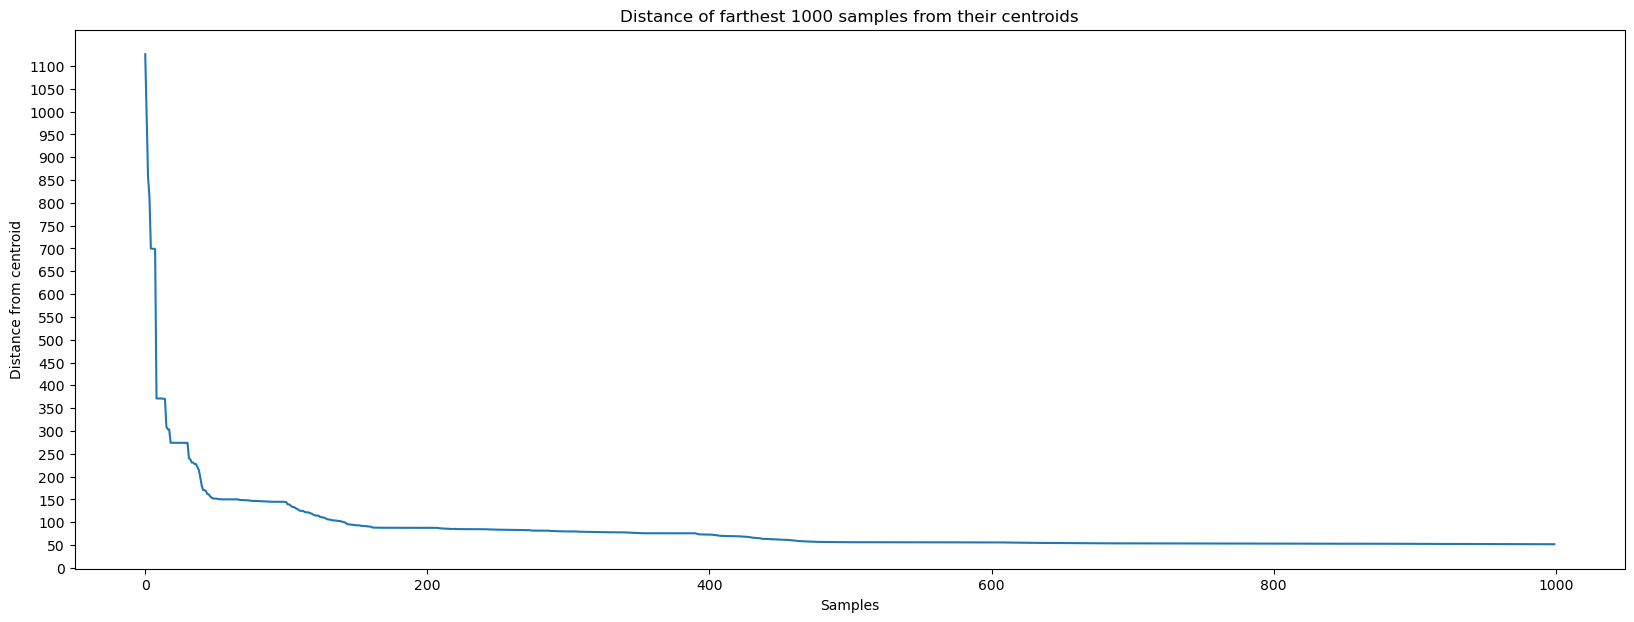

In [71]:
# Plot the samples with their distances

# Create a figure
plt.figure(figsize=((20,7)))

# Plot data points
plt.plot(range(len(farthest_1000_samples)), farthest_1000_samples["distance_to_centroid"])

# Set title and axes labels
plt.title("Distance of farthest 1000 samples from their centroids")
plt.xlabel("Samples")
plt.ylabel("Distance from centroid")
plt.yticks(np.arange(0, max(farthest_1000_samples["distance_to_centroid"]) + 1, 50))

# Show the plot
plt.show()


The previous chart shows a declining trend exhibiting the decreased distance of samples since they are plotted sorted in a descending order. 

To determine a threshold, we can pick a distance value on this chart where the majority of samples fall below it. For instance, distance=150, since this value splits the figure into two distinct groups, the one to the left with higher distance values, and the other samples to the right with a relatively small distance from their centroid.

Having that said, we believe a distance threshold of 150 will be useful to divide the anomalous connections from the normal ones, and thus can be used to spot the intrusions in this version of the dataset.